# __Pumpkinseed analysis__
By Jakob Adamsson and Emil Gullbrandsson
## __Introduction:__
We have chosen to analyse pumpkinseeds, we are going to investigate the roundness,compactness and solidity relations using __[this](https://www.kaggle.com/mkoklu42/pumpkin-seeds-dataset?select=Pumpkin_Seeds_Dataset.arff)__ dataset.
From what we gathered this datasat exists mainly because the author wanted to use it for machinelearning.  
__How roundness,compactness and solidity are calculated:__
- [Roundness](https://en.wikipedia.org/wiki/Roundness) 
- [Compactness](https://en.wikipedia.org/wiki/Compactness_measure_of_a_shape)
- [Solidity](http://www.cyto.purdue.edu/cdroms/micro2/content/education/wirth10.pdf)

### __Why we choose this dataset__
We choose this dataset because it the main purpose of was to train an ai to recognize pumpkinseeds using machine learning.
Another reason was that we feel like this is a good dataset to use since it was only numerical values and this is our first experience in using jupyter notebook and analyzing datasets.

# __Hypothesis__
__1) What is the potential relationship that may exists between roundness and compactness?__  
- __H0:__  There is no correlation between compactness and roundness.
- __H1:__  There is a correlation between compactness and roundness.

__2) What is the potential relationship that may exists between roundness and solidity?__
- __H0:__  There is no correlation between solidity and roundness.
- __H1:__  There is a correlation between solidity and roundness.

## __Strategy:__
We will approach this task by first plotting the graphs (which includes experiments to conclude what representation would fit this dataset the best) and try to judge if there is any linear correlation.
Then confirm our theory by using a specific test suitable for the variables we are comparing.

In [1]:
%matplotlib inline
# Importing pandas
import matplotlib.pyplot as mpl
import pandas as pd 
import numpy as np 
import scipy.stats as scp
 
from mpl_toolkits.mplot3d import * 
 
import ipywidgets as widgets 
from ipywidgets import interact 

In [2]:
df = pd.read_excel("Pumpkin_Seeds_Dataset.xlsx")

interactive(children=(IntSlider(value=1, description='level', max=2, min=1), Output()), _dom_classes=('widget-…

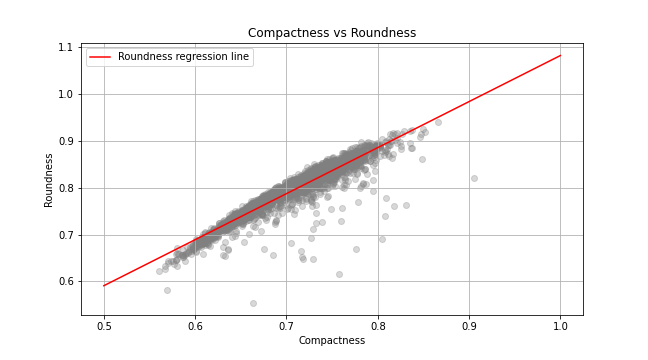

In [3]:
%matplotlib widget
x = df['Compactness']
y = df['Roundness']

fig = mpl.figure(figsize=(9,5)) 
ax = fig.add_subplot() 
ax.scatter(x,y, alpha= 0.3, color="grey")
def erase_plot():
    ax.clear() 

def f(level): 
    erase_plot() 
    deg = level 
    data_reg = np.polyfit(x,y, deg)
    ax.set_xlabel("Compactness")
    ax.set_ylabel("Roundness")
    xp = np.linspace(0.5,1,156) 
    yp = np.polyval(data_reg, xp) 
    ax.scatter(x,y, alpha= 0.3, color="grey")
    ax.plot(xp, yp, label='Roundness regression line', color='red') 
    ax.grid() 
    ax.legend()
    ax.set_title('Compactness vs Roundness') 
 
interact(f, level=widgets.IntSlider(min=1, max=2, step=1, value=1));

In [4]:
scp.pearsonr(x,y)

(0.9333081312798007, 0.0)

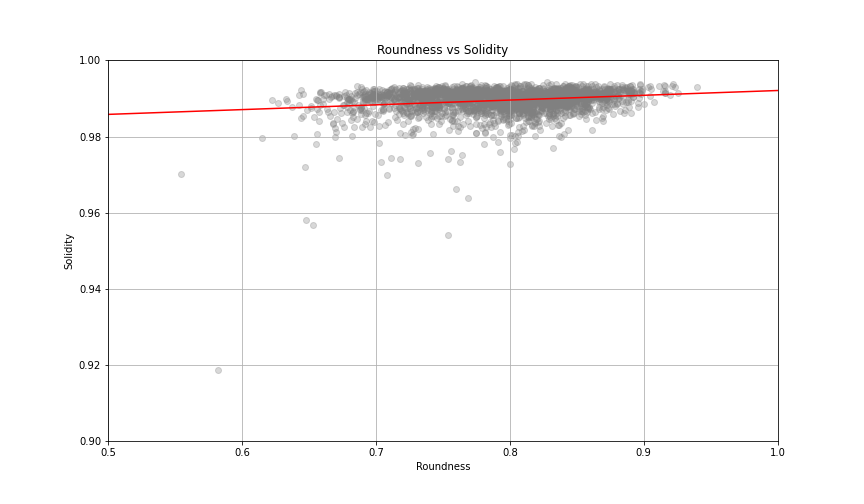

In [5]:

x1 = df['Solidity']
y1 = df['Roundness']
data_linreg = np.polyfit(y1,x1,1)
xp = np.linspace(0.5,1, 156)
lr = np.polyval(data_linreg, xp)
fig1 = mpl.figure(figsize=(12,7))
ax2 = fig1.add_subplot()
ax2.grid()
ax2.set_ylim(0.9,1)
ax2.set_xlim(0.5,1)
ax2.set_ylabel('Solidity')
ax2.set_xlabel('Roundness')
ax2.set_title('Roundness vs Solidity')
ax2.scatter(y1,x1, alpha= 0.3, color="grey")
ax2.plot(xp,lr,color = 'red');

In [6]:
scp.pearsonr(x,y)

(0.9333081312798007, 0.0)

# __Conclusion__
__What is the potential relationship that may exists between roundness and compactness?__  
By observing the plot ___**`Roundness vs Compactness`**___ we get the feeling that there might be linear correlation. To investigate this line of though further we decided to conduct a pearson correlation test. The result we got from running 
```py 
scp.pearsonr(Compactness,Roundness)
```
The pearson correlation coefficent was determined to be 0.9333081312798006 which indicate a very strong linear correlation.
This means that there is some kind of connections between these two attributes.  
This means we can safely reject our nullhypothesis, that is: 
- __H0:__ There is no correlation between compactness and roundness.  

The evidence strongly suggest that there exists an linear correlation between how compact a pumpkinseed is with how round it is.

__What is the potential relationship that may exists between solidity and roundness?__

Due to the nature of the data we decided it would be better to plot roundess on x-axis vs solidity on the y-axis. Our first observation of the graph  ___**`Solidity vs Roundness `**___ is that the slope of the regression line is close to being zero which would indicate that there might be no correlation. However we ran the pearsontest once again to verify this suspicion, that is:
```py
scp.pearsonr(Roundness,Solidity)
```
Which expectadly return very low correlation value : 0.20083633911623344  
Which means we cannot reject our nullhypothesis 
- __H0:__  There is no correlation between solidity and roundness.  

At this point we can say it doesn't seem to exist any correlation between solidity and roundness for pumpkinseeds.This means that in order for us to be able to reject H0 we need to investigate the data further and in more detail, however this is outside of the scope for course. 